In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn

In [2]:
data = pd.read_csv("../Datasets/ptb-xl/saved_splits/data.csv")

# Some statistics / things worth noting in the dataset

## Shared

Some stats that are shared across the dataset for both the text and ECG signals.

1. How many of the recordings are validated by a human.

Text(0.5, 0, 'Validated by human')

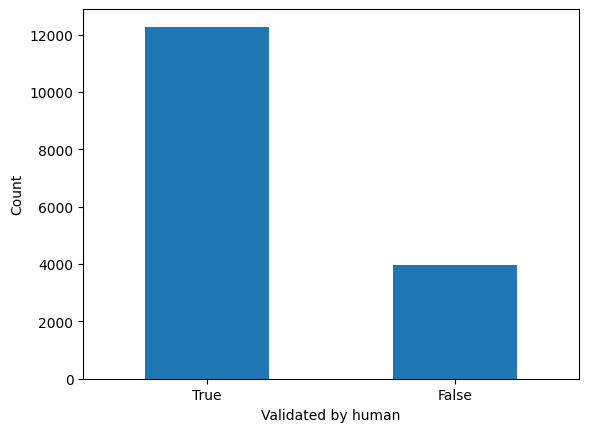

In [3]:
plot = data["validated_by_human"].value_counts().plot(kind="bar", rot=0)
plot.set_ylabel("Count")
plot.set_xlabel("Validated by human")

## Text

Analyzing the text reports will give some insights into what exclusive information might be gained from it, and how much semantic value they hold.

1. Minimum and maximum length of text reports and the average length.

In [4]:
min_length = data["report"].str.len().min()
max_length = data["report"].str.len().max()
average_length = data["report"].str.len().mean().round()
print(f"Minimum length of text reports: {min_length}")
print(f"Maximum length of text reports: {max_length}")
print(f"Average length of text reports: {average_length}")

Minimum length of text reports: 1
Maximum length of text reports: 301
Average length of text reports: 89.0


The average length of text reports for each diagostic superclass

In [5]:
norm_rows = data[data['diagnostic_superclass'].apply(lambda x: x == "['NORM']")]
mi_rows = data[data['diagnostic_superclass'].apply(lambda x: x == "['MI']")]
sttc_rows = data[data['diagnostic_superclass'].apply(lambda x: x == "['STTC']")]
cd_rows = data[data['diagnostic_superclass'].apply(lambda x: x == "['CD']")]
hyp_rows = data[data['diagnostic_superclass'].apply(lambda x: x == "['HYP']")]
multiple_values = data[data["diagnostic_superclass"].apply(lambda x: len(x) > 1)]

print(f"Number of normal reports: {len(norm_rows)}")
print(f"Number of MI reports: {len(mi_rows)}")
print(f"Number of STTC reports: {len(sttc_rows)}")
print(f"Number of CD reports: {len(cd_rows)}")
print(f"Number of HYP reports: {len(hyp_rows)}")
print(f"Number of reports with multiple values: {len(multiple_values)}")
print(f"Average length of normal reports: {norm_rows['report'].str.len().mean()}")
print(f"Average length of MI reports: {mi_rows['report'].str.len().mean()}")
print(f"Average length of STTC reports: {sttc_rows['report'].str.len().mean()}")
print(f"Average length of CD reports: {cd_rows['report'].str.len().mean()}")
print(f"Average length of HYP reports: {hyp_rows['report'].str.len().mean()}")
print(f"Average length of reports with multiple values: {multiple_values['report'].str.len().mean()}")


Number of normal reports: 9069
Number of MI reports: 2532
Number of STTC reports: 2400
Number of CD reports: 1708
Number of HYP reports: 535
Number of reports with multiple values: 16244
Average length of normal reports: 58.571617598412175
Average length of MI reports: 147.16350710900474
Average length of STTC reports: 121.69125
Average length of CD reports: 107.38817330210773
Average length of HYP reports: 109.94766355140187
Average length of reports with multiple values: 88.53139620783058


### The number of unique reports for each diagnostic superclass

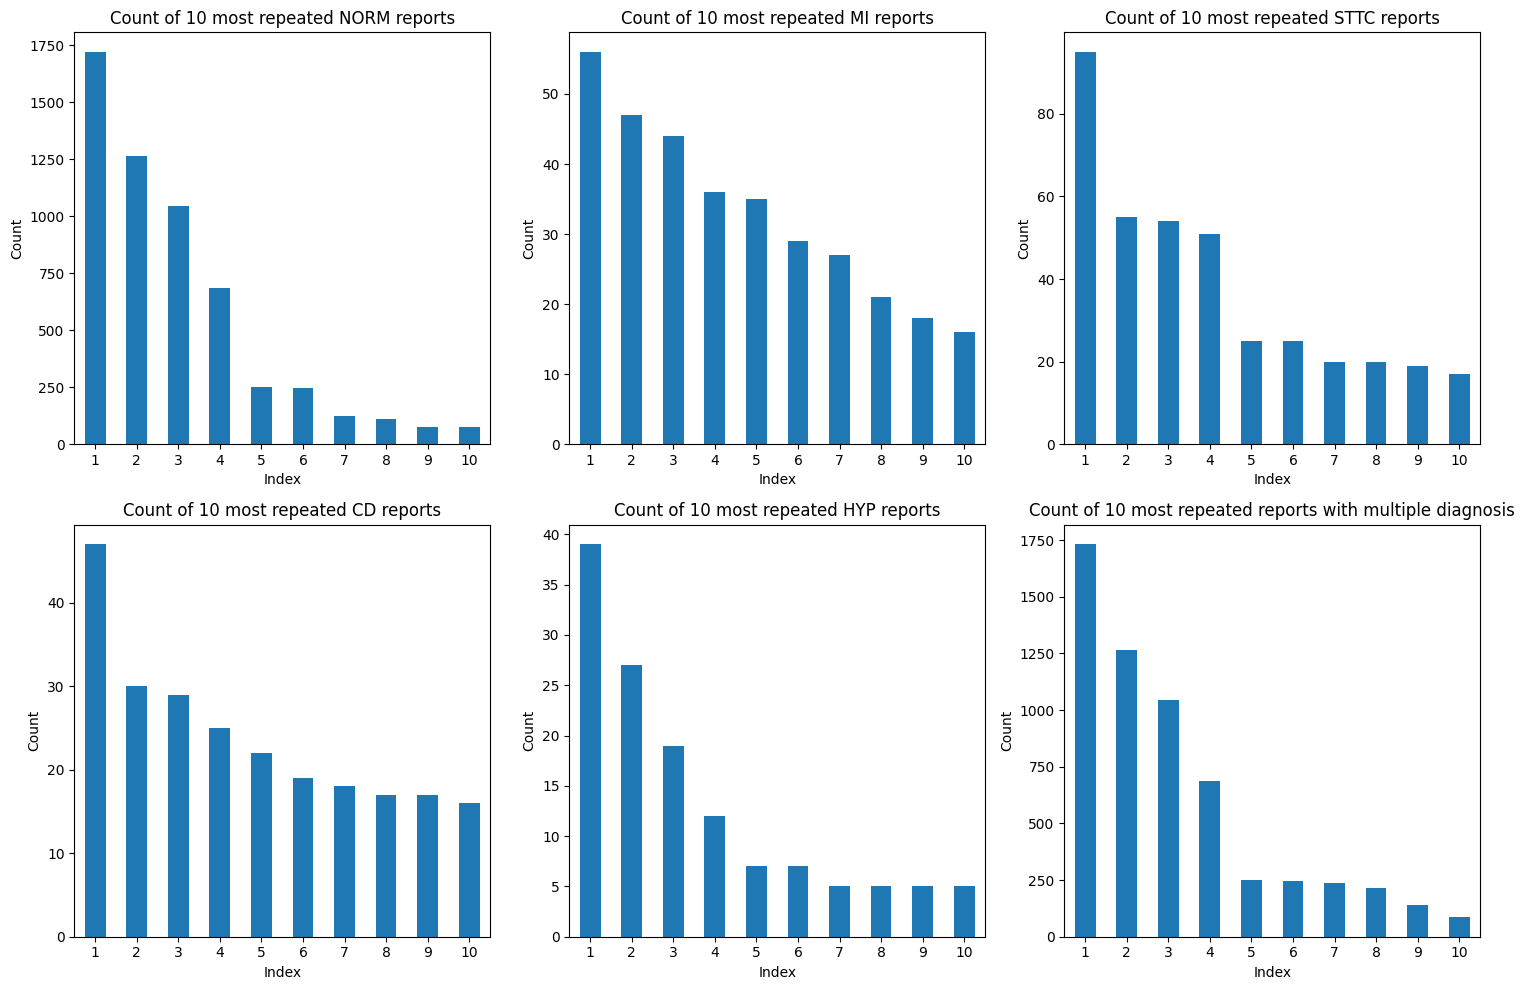

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot for norm_rows
ax1 = axes[0, 0]
norm_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax1, rot=0)
ax1.set_ylabel("Count")
ax1.set_xlabel("Index")
ax1.set_title("Count of 10 most repeated NORM reports")
ax1.set_xticklabels(range(1, 11))

# Plot for mi_rows
ax2 = axes[0, 1]
mi_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax2, rot=0)
ax2.set_ylabel("Count")
ax2.set_xlabel("Index")
ax2.set_title("Count of 10 most repeated MI reports")
ax2.set_xticklabels(range(1, 11))

# Plot for sttc_rows
ax3 = axes[0, 2]
sttc_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax3, rot=0)
ax3.set_ylabel("Count")
ax3.set_xlabel("Index")
ax3.set_title("Count of 10 most repeated STTC reports")
ax3.set_xticklabels(range(1, 11))

# Plot for cd_rows
ax4 = axes[1, 0]
cd_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax4, rot=0)
ax4.set_ylabel("Count")
ax4.set_xlabel("Index")
ax4.set_title("Count of 10 most repeated CD reports")
ax4.set_xticklabels(range(1, 11))

# Plot for hyp_rows
ax5 = axes[1, 1]
hyp_rows["report"].value_counts().head(10).plot(kind="bar", ax=ax5, rot=0)
ax5.set_ylabel("Count")
ax5.set_xlabel("Index")
ax5.set_title("Count of 10 most repeated HYP reports")
ax5.set_xticklabels(range(1, 11))

# Plot for multiple_values
ax6 = axes[1, 2]
multiple_values["report"].value_counts().head(10).plot(kind="bar", ax=ax6, rot=0)
ax6.set_ylabel("Count")
ax6.set_xlabel("Index")
ax6.set_title("Count of 10 most repeated reports with multiple diagnosis")
ax6.set_xticklabels(range(1, 11))

plt.tight_layout()
plt.savefig("../Assets/Plots/most_repeated_reports.png", dpi=300)
plt.show()


### Lengths of the reports

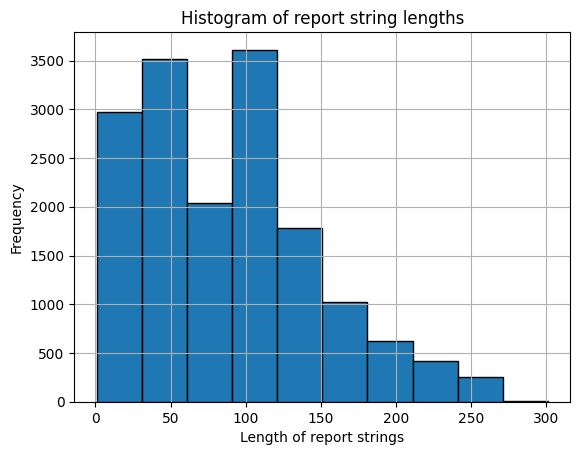

In [7]:
lengths = data["report"].str.len()

# Plot histogram
plt.hist(lengths, bins=10, edgecolor='black')
plt.xlabel('Length of report strings')
plt.ylabel('Frequency')
plt.title('Histogram of report string lengths')
plt.grid(True)
plt.show()

### Lengths of the reports for each diagnostic superclass

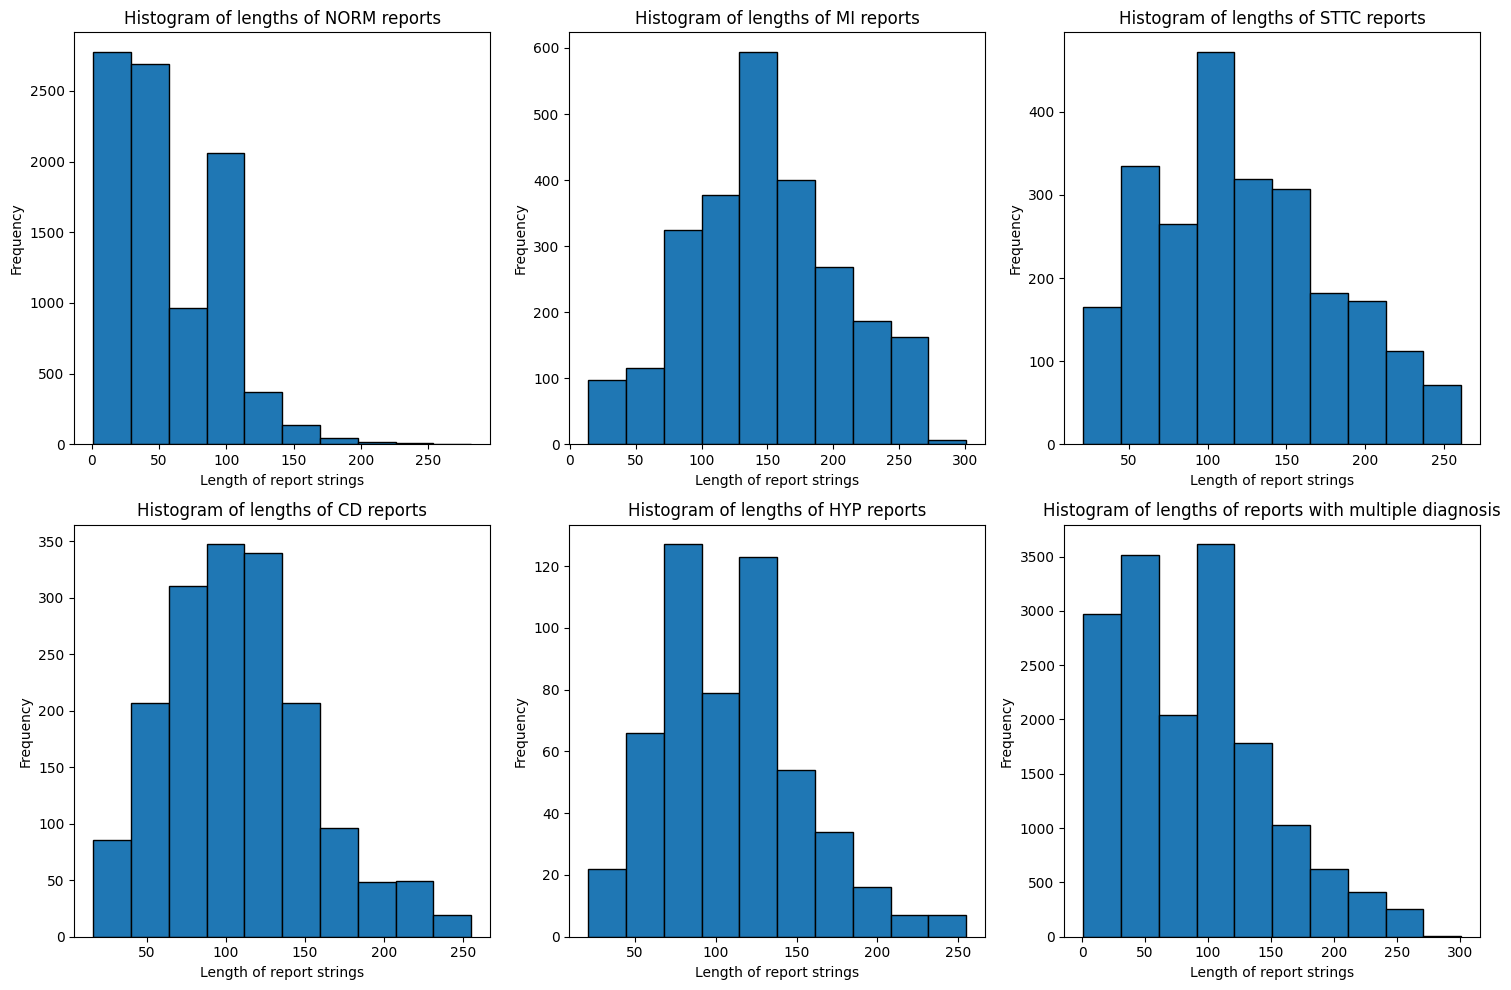

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms for norm_rows
ax1 = axes[0, 0]
norm_rows["report"].str.len().plot.hist(ax=ax1, bins=10, edgecolor='black')
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Length of report strings")
ax1.set_title("Histogram of lengths of NORM reports")

# Plot histograms for mi_rows
ax2 = axes[0, 1]
mi_rows["report"].str.len().plot.hist(ax=ax2, bins=10, edgecolor='black')
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Length of report strings")
ax2.set_title("Histogram of lengths of MI reports")

# Plot histograms for sttc_rows
ax3 = axes[0, 2]
sttc_rows["report"].str.len().plot.hist(ax=ax3, bins=10, edgecolor='black')
ax3.set_ylabel("Frequency")
ax3.set_xlabel("Length of report strings")
ax3.set_title("Histogram of lengths of STTC reports")

# Plot histograms for cd_rows
ax4 = axes[1, 0]
cd_rows["report"].str.len().plot.hist(ax=ax4, bins=10, edgecolor='black')
ax4.set_ylabel("Frequency")
ax4.set_xlabel("Length of report strings")
ax4.set_title("Histogram of lengths of CD reports")

# Plot histograms for hyp_rows
ax5 = axes[1, 1]
hyp_rows["report"].str.len().plot.hist(ax=ax5, bins=10, edgecolor='black')
ax5.set_ylabel("Frequency")
ax5.set_xlabel("Length of report strings")
ax5.set_title("Histogram of lengths of HYP reports")

# Plot histograms for multiple_values
ax6 = axes[1, 2]
multiple_values["report"].str.len().plot.hist(ax=ax6, bins=10, edgecolor='black')
ax6.set_ylabel("Frequency")
ax6.set_xlabel("Length of report strings")
ax6.set_title("Histogram of lengths of reports with multiple diagnosis")

plt.tight_layout()
plt.show()


## ECG

In [9]:
# Load ecg data
ecg_data = torch.load("../Datasets/ptb-xl/saved_splits/ecg_data.pt").clone().detach().permute(0, 2, 1)

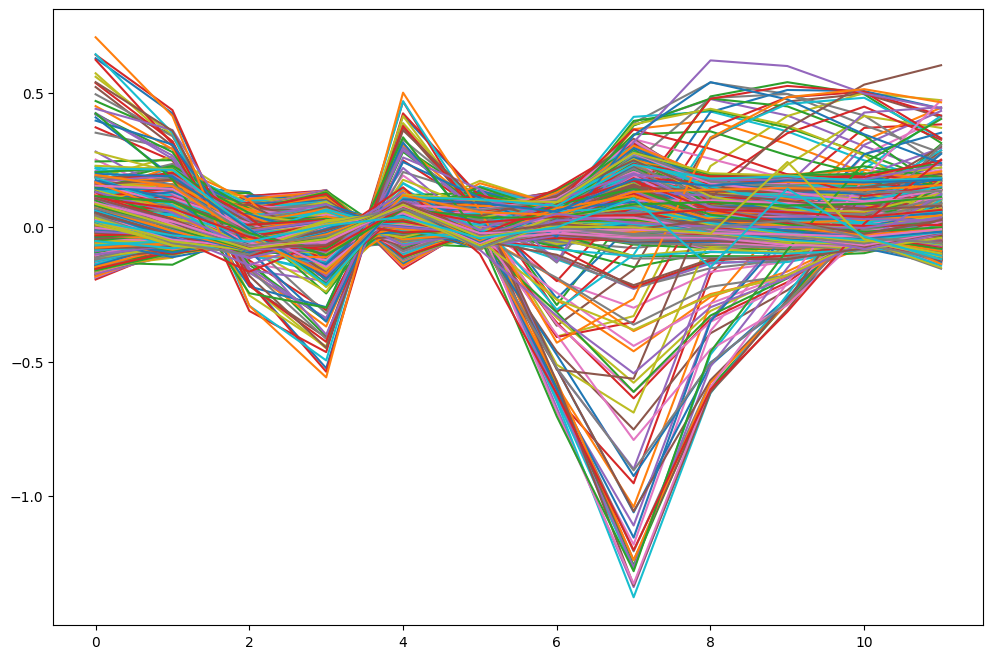

In [10]:
# Before standardizing
plt.figure(figsize=(12, 8))
plt.plot(ecg_data[0])
plt.show()

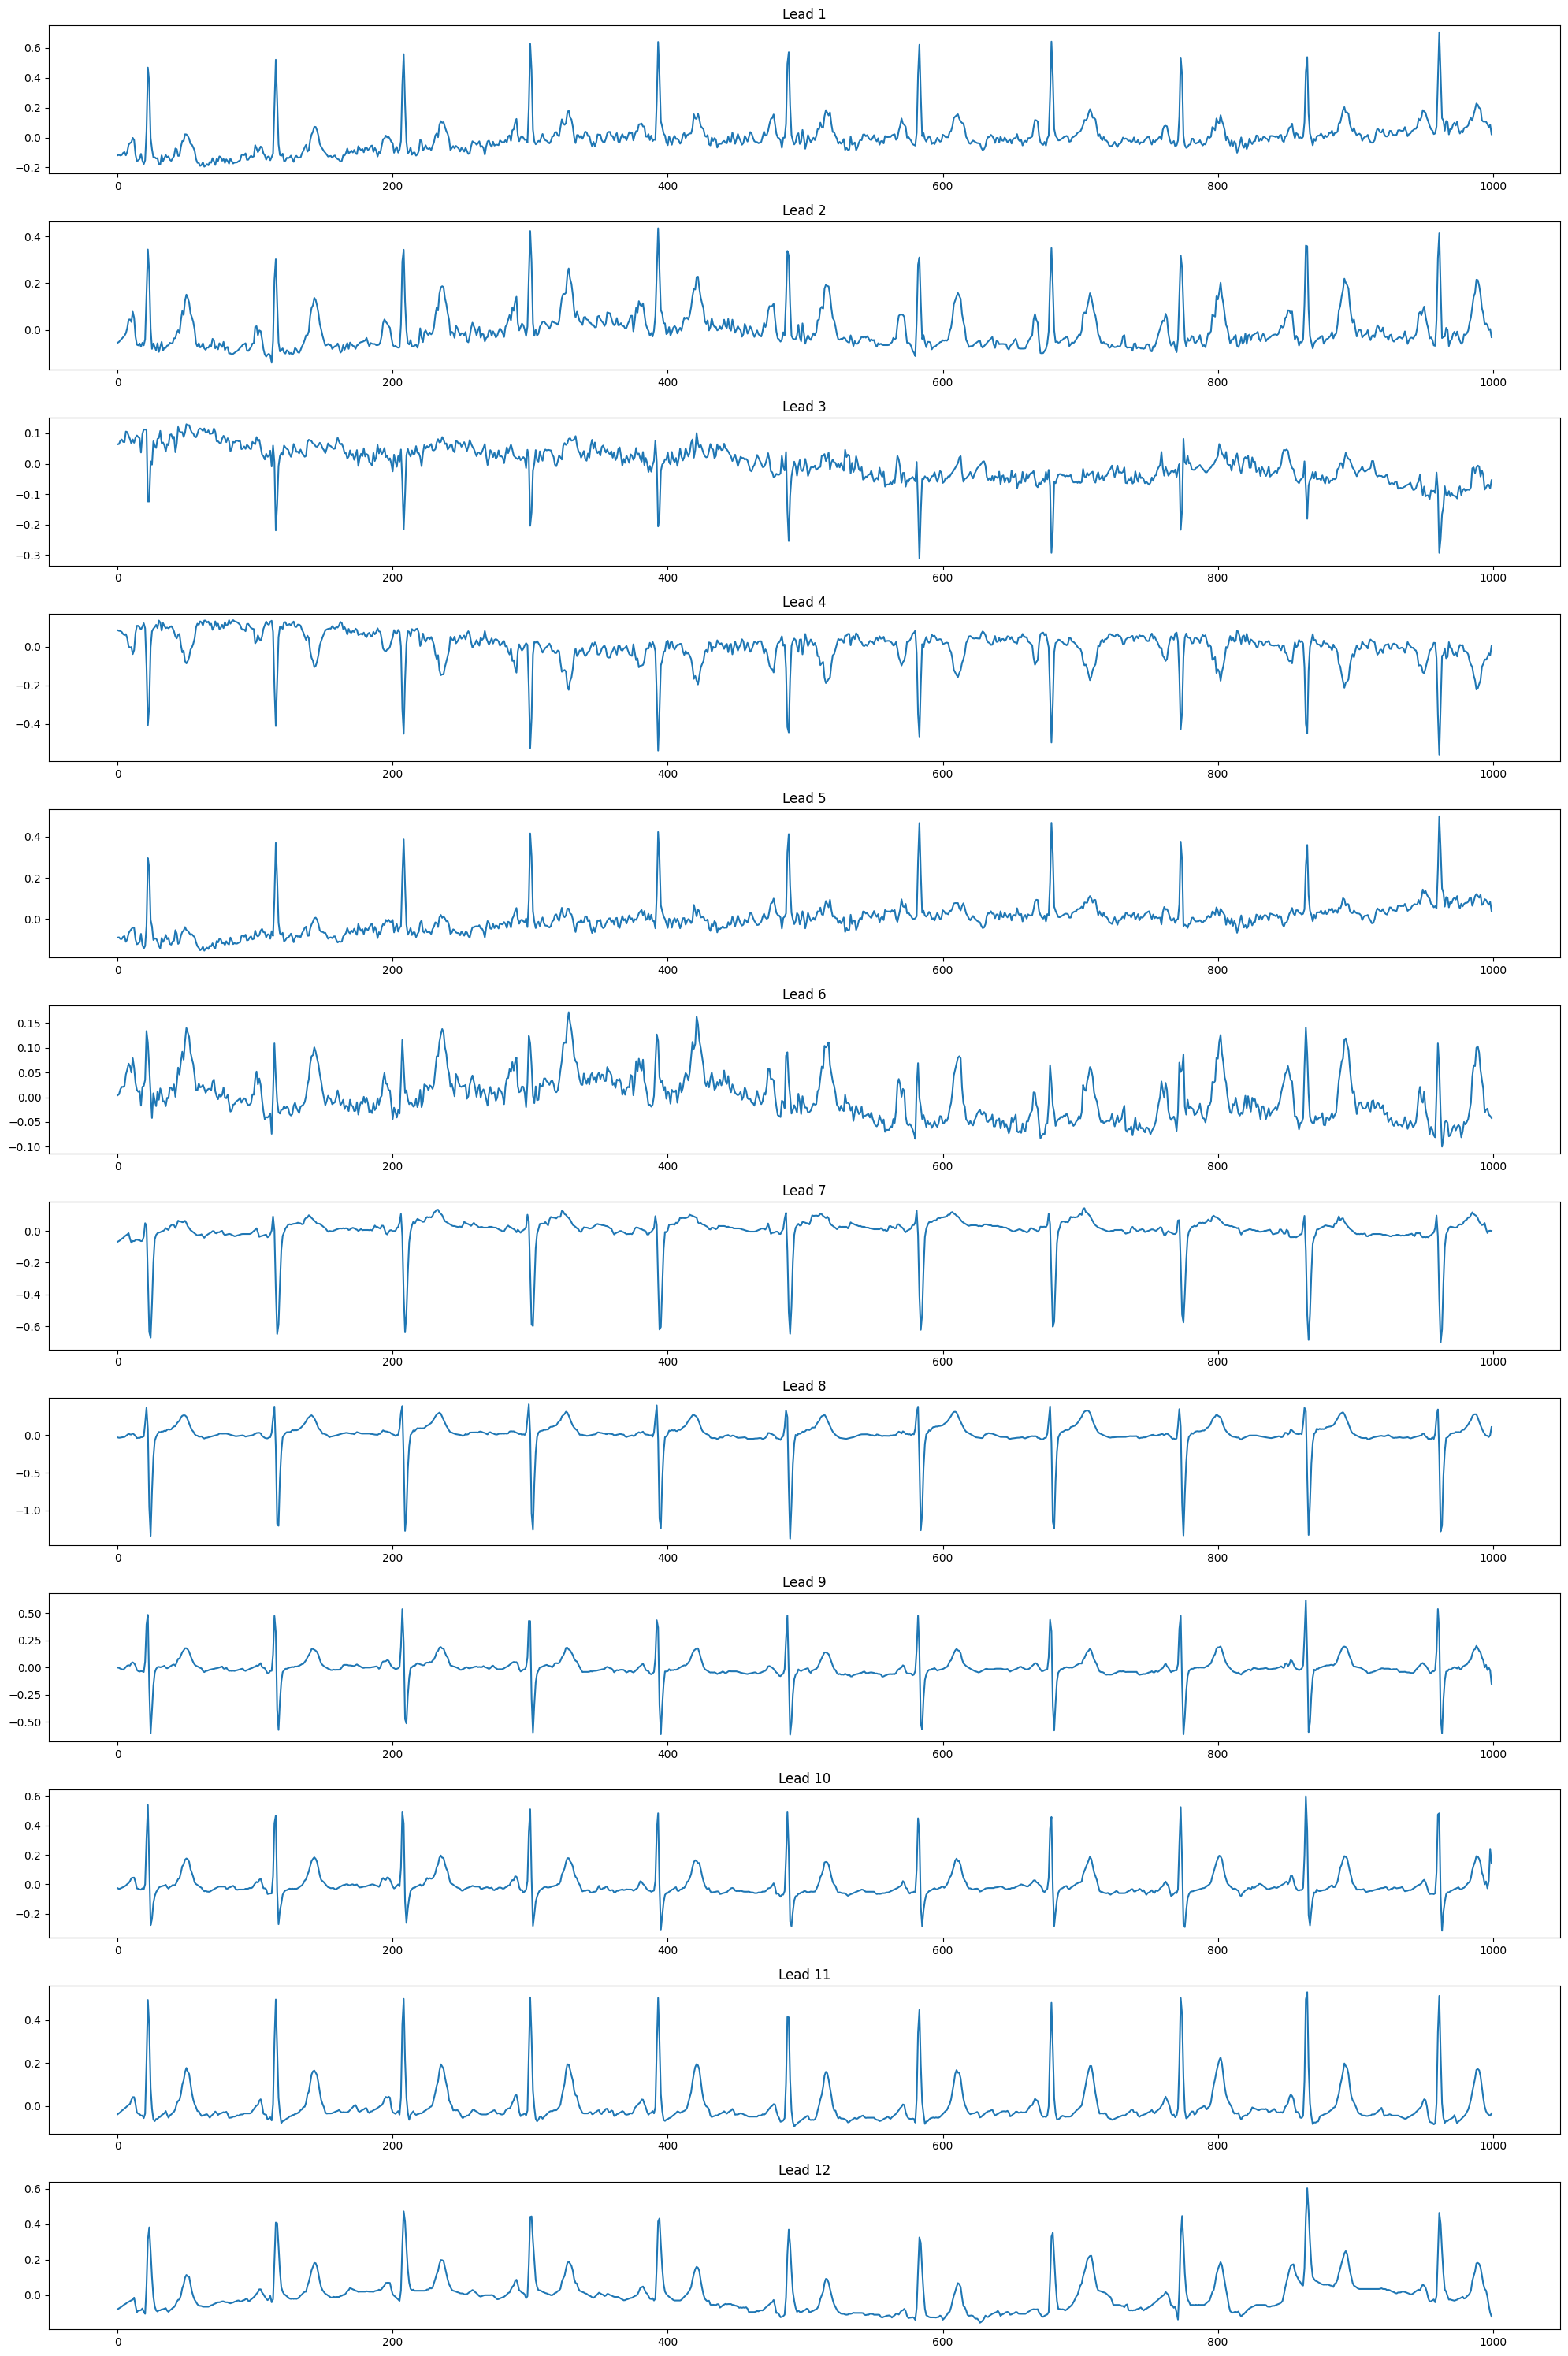

In [11]:
# Plot all 12 leads of the first measurement
plt.figure(figsize=(20, 30))
for i in range(12):
    plt.subplot(12, 1, i+1)
    plt.plot(ecg_data[0, i, :])
    plt.title(f'Lead {i+1}')
plt.tight_layout()
plt.show()

In [12]:
ecg_data[0].shape

torch.Size([12, 1000])

Min value after scaling: 0.0
Max value after scaling: 1.0


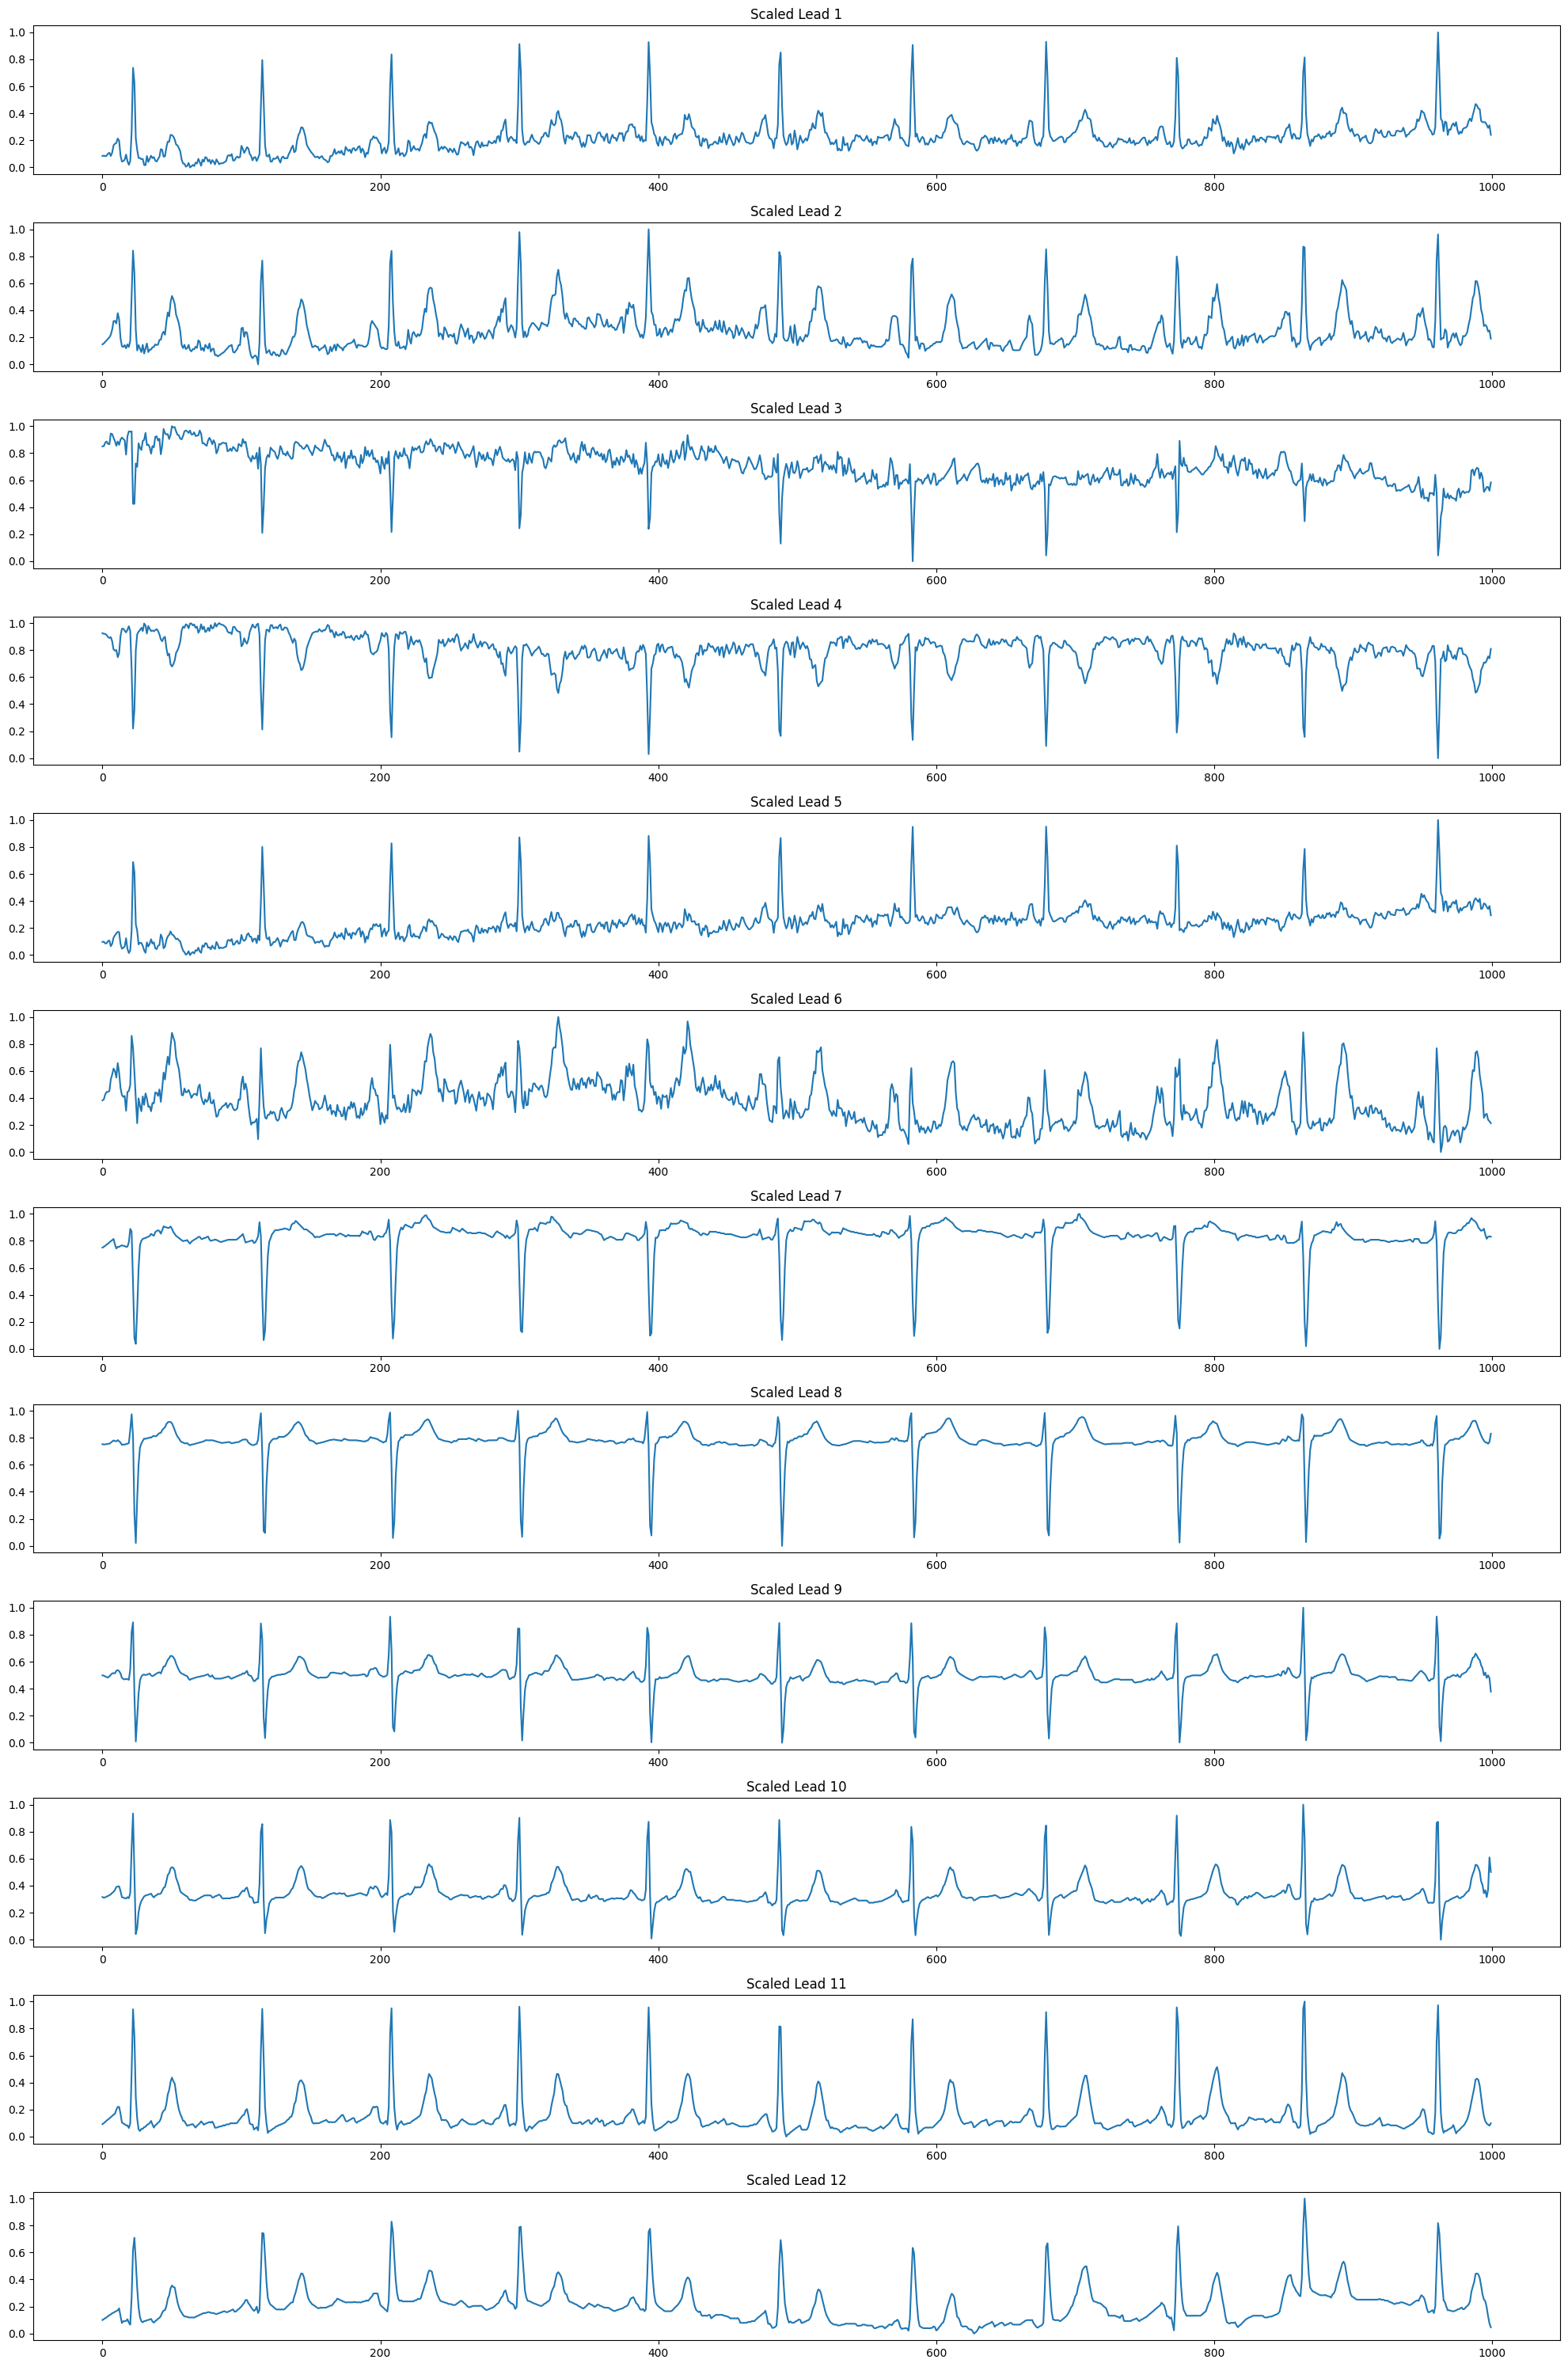

In [13]:
import torch
import matplotlib.pyplot as plt

def min_max_scale(data):
    """
    Scales the data to be between 0 and 1 for each signal independently.
    
    Parameters:
    data (torch.Tensor): The input data to scale.
    
    Returns:
    torch.Tensor: The scaled data.
    """
    min_val, _ = data.min(dim=2, keepdim=True)
    max_val, _ = data.max(dim=2, keepdim=True)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# Apply Min-Max scaling to the ECG data
scaled_ecg_data = min_max_scale(ecg_data)

# Check the scaled data range
print("Min value after scaling:", scaled_ecg_data.min().item())
print("Max value after scaling:", scaled_ecg_data.max().item())

# Plot the scaled signals for the first measurement
plt.figure(figsize=(20, 30))
for i in range(12):
    plt.subplot(12, 1, i+1)
    plt.plot(scaled_ecg_data[0, i, :].cpu().numpy())
    plt.title(f'Scaled Lead {i+1}')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'After standardizing')

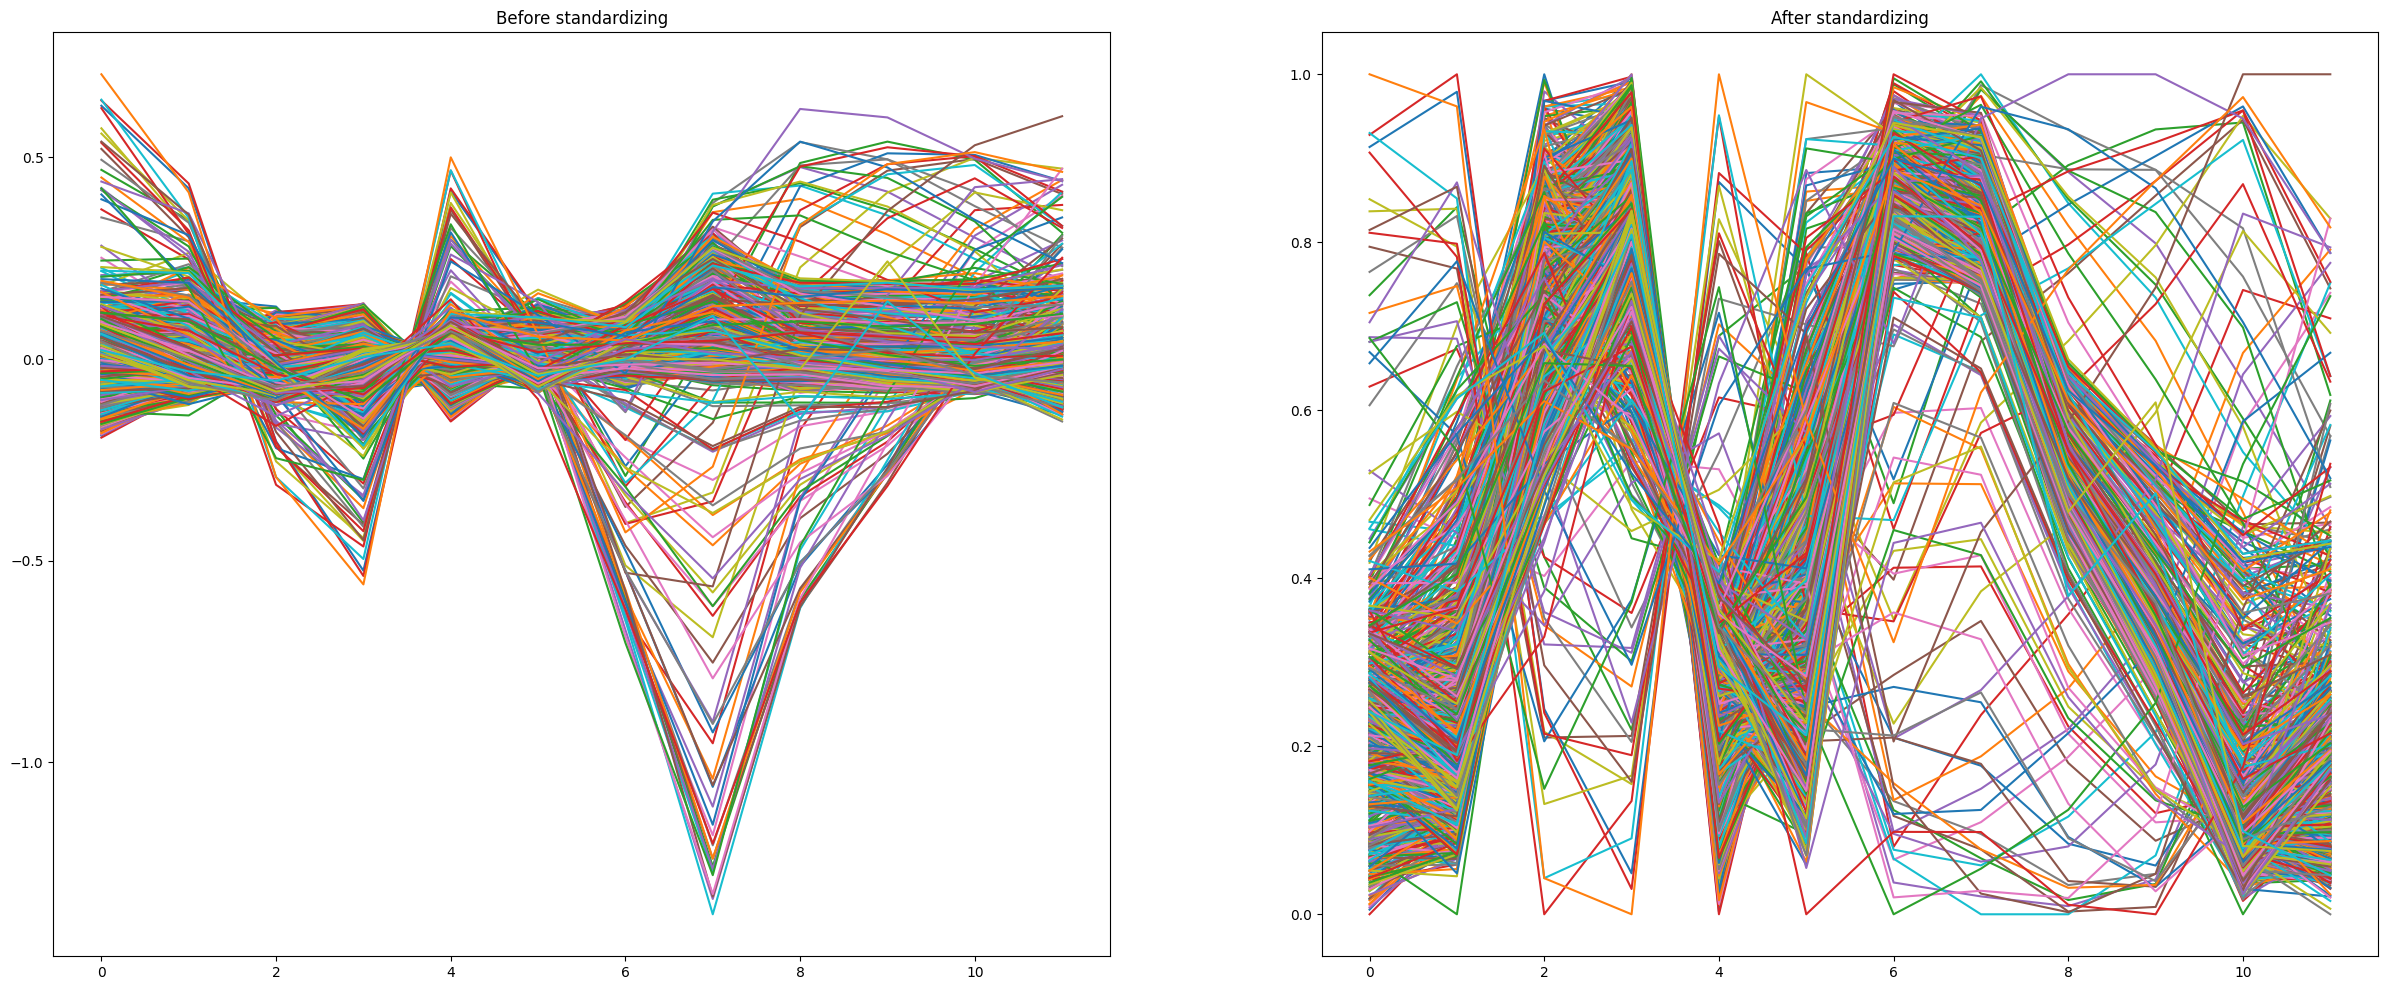

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(30, 12))

axs[0].plot(ecg_data[0])
axs[0].set_title("Before standardizing")

axs[1].plot(scaled_ecg_data[0])
axs[1].set_title("After standardizing")

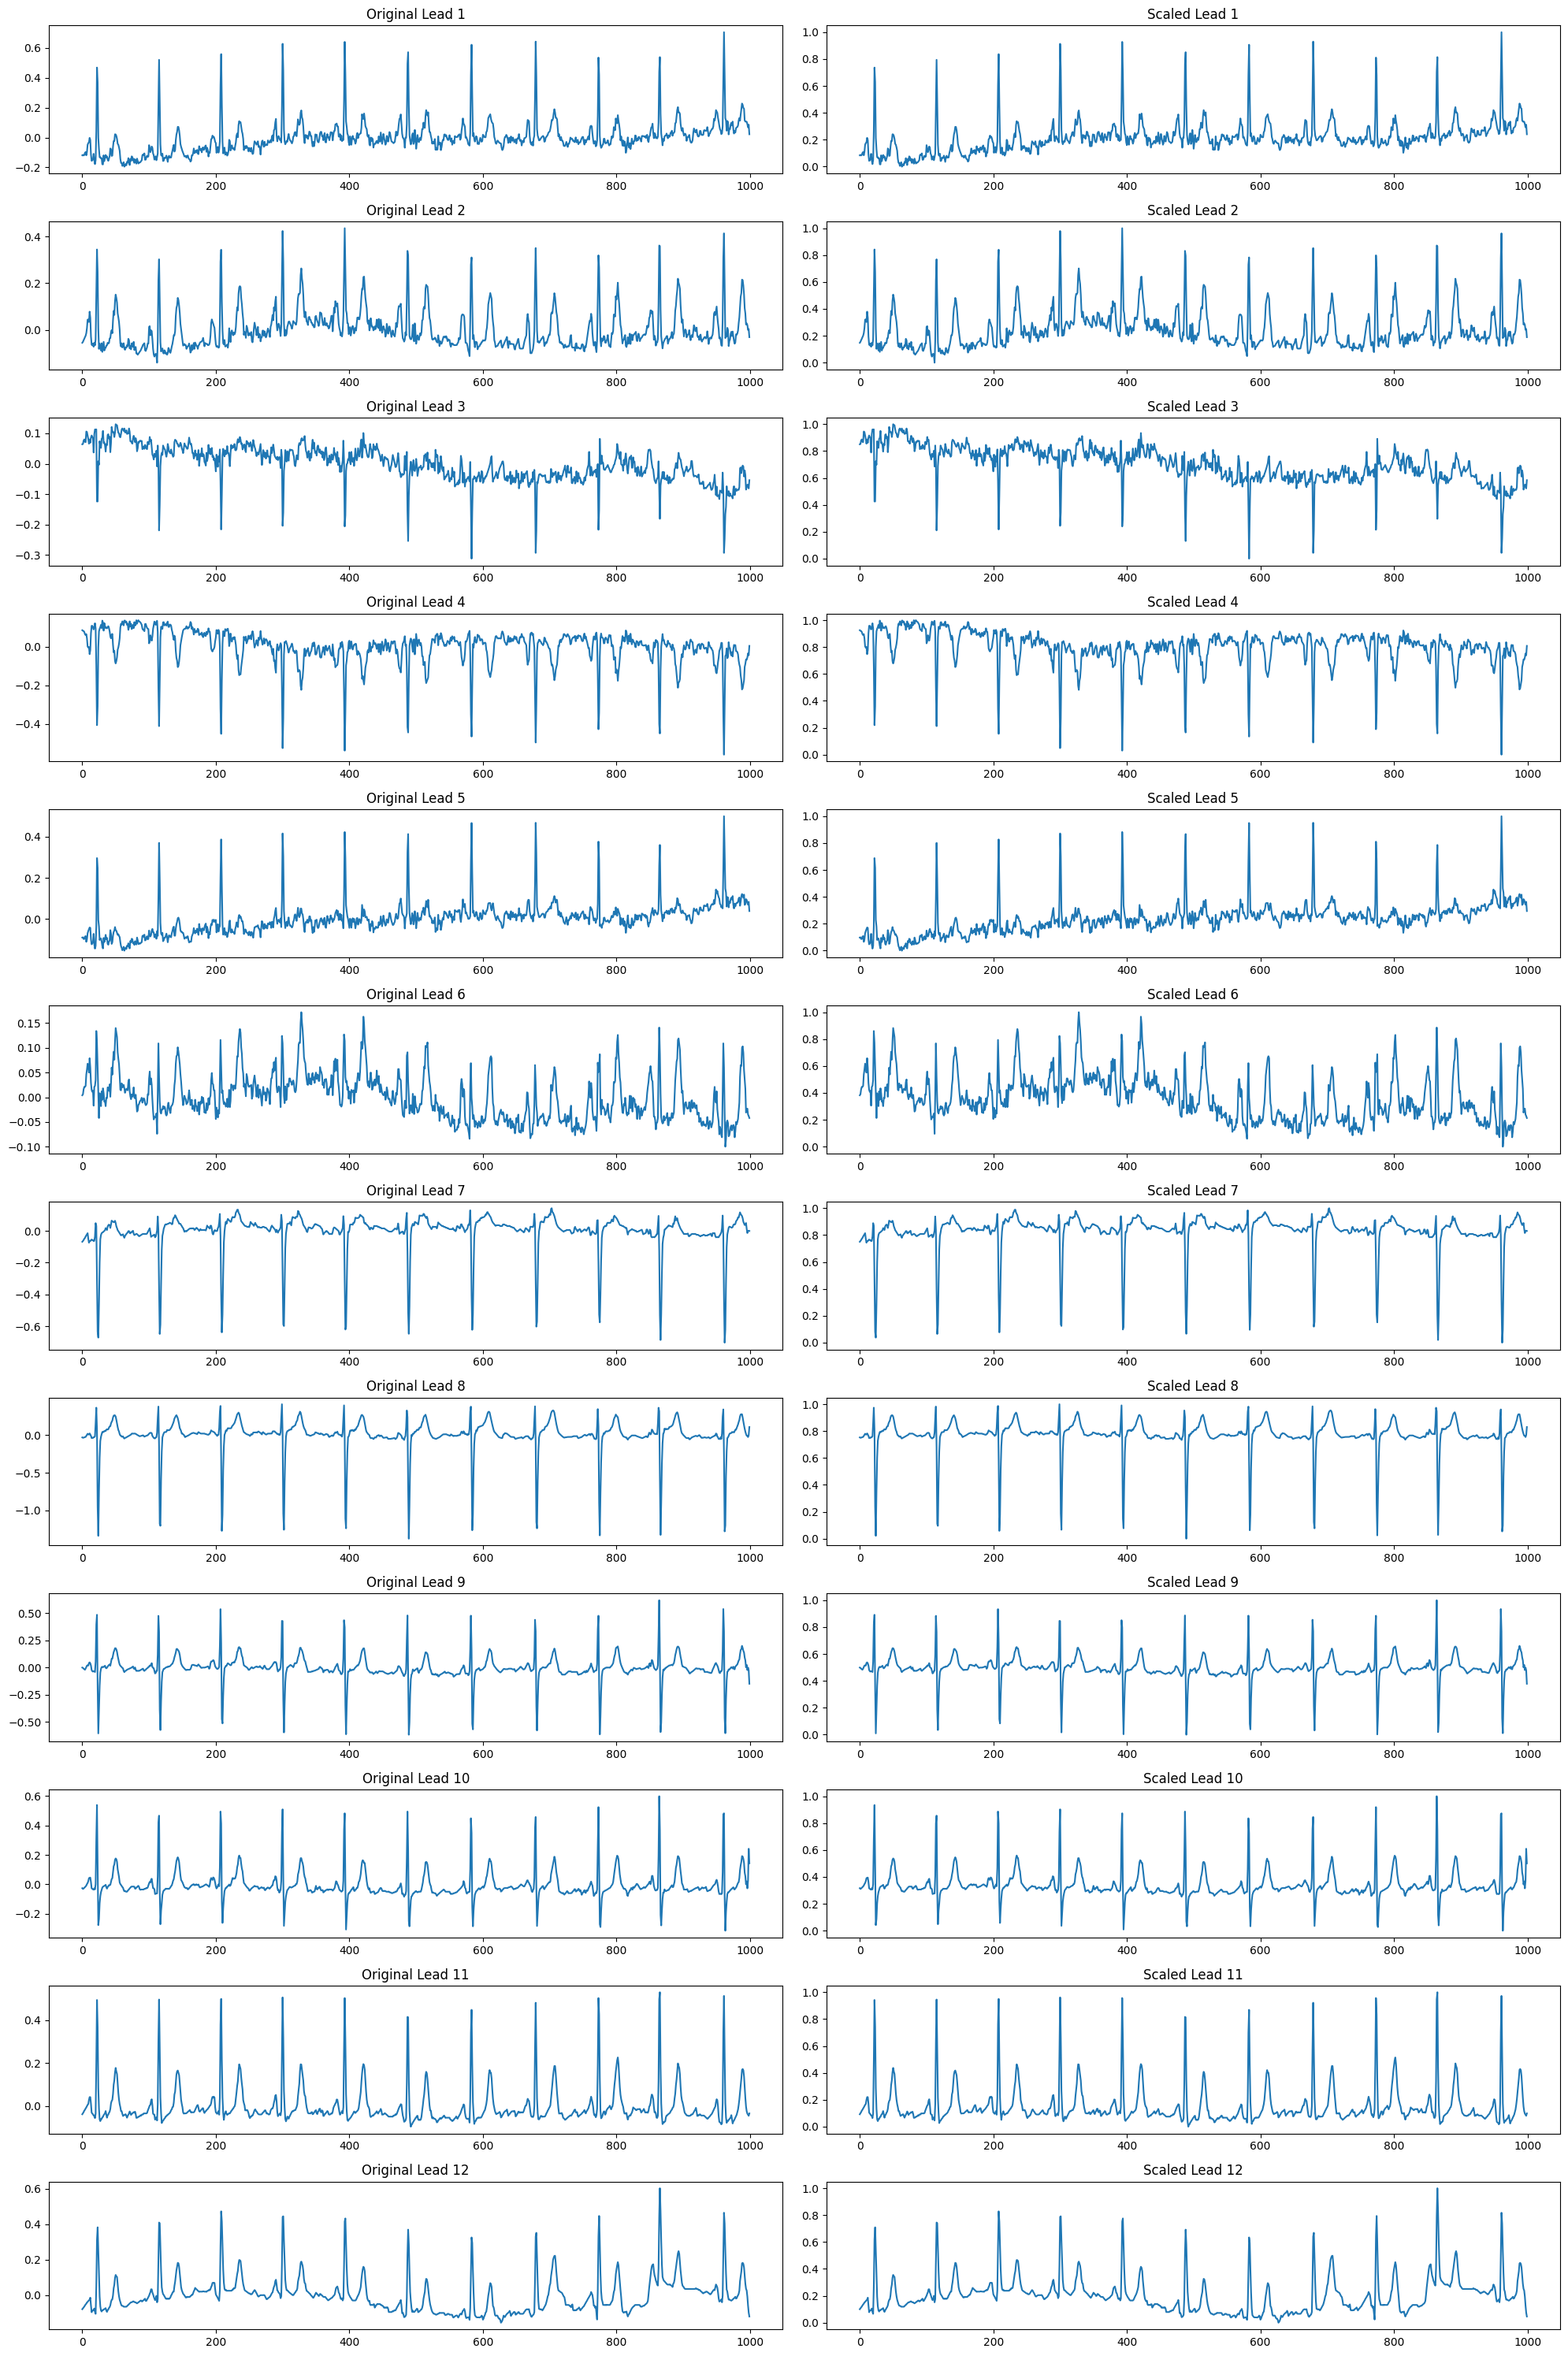

In [15]:
# Plot the original and scaled signals for the first measurement
fig, axs = plt.subplots(12, 2, figsize=(20, 30))

for i in range(12):
    # Plot original signal
    axs[i, 0].plot(ecg_data[0, i, :].cpu().numpy())
    axs[i, 0].set_title(f'Original Lead {i+1}')
    
    # Plot scaled signal
    axs[i, 1].plot(scaled_ecg_data[0, i, :].cpu().numpy())
    axs[i, 1].set_title(f'Scaled Lead {i+1}')

plt.tight_layout()
plt.show()

# Evaluating the embeddings

### Calculating the average similarity between positive pairs and negative pairs respectively.
First, calculate the similarities between the embedding when the model is initialized, and compare to the trained model.

In [16]:
from models.resnet import ResNet, ResidualBlock
from models.clinical_bert import bio_clinical_BERT
from configs.ptb_xl_configs import TestingConfigs
from dataloader.ptb_xl import ptb_xl_data_generator
from train_eval.trainer import Trainer
import os
from utils.utils import check_sims
configs = TestingConfigs()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ecg_model = ResNet(configs.in_channels, configs.num_classes, 18, ResidualBlock).to(device)
text_model = bio_clinical_BERT()
trainer = Trainer()
train_loader, val_loader, test_loader = ptb_xl_data_generator(configs, include_text=True)

c:\Users\ssjsi\Documents\Bachelors-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
ecg, text, target = train_loader.dataset[:128]
ecg = ecg.to(device)
ecg_embeddings_orig = ecg_model(ecg)
text_embeddings = text_model(text).to(device)

avg_negative_similarities, avg_positive_similarities = check_sims(configs.batch_size, ecg_embeddings_orig, text_embeddings)
print(f"Average negative similarity: {avg_negative_similarities}")
print(f"Average positive similarity: {avg_positive_similarities}")

# Load the trained model
ecg_model.load_state_dict(torch.load("C:/Users/ssjsi/Documents/Bachelors-project/saved_models/Resnet18_pre_trained"))
ecg_model.eval()
ecg_embeddings = ecg_model(ecg)

avg_negative_similarities, avg_positive_similarities = check_sims(configs.batch_size, ecg_embeddings, text_embeddings)
print(f"Average negative similarity: {avg_negative_similarities}")
print(f"Average positive similarity: {avg_positive_similarities}")

ecg_model.load_state_dict(torch.load(os.path.join("C:/Users/ssjsi/Documents/Bachelors-project/saved_models/Resnet18_pre_trained_20_epochs")))
ecg_model.eval()

ecg_embeddings = ecg_model(ecg)
avg_negative_similarities, avg_positive_similarities = check_sims(configs.batch_size, ecg_embeddings, text_embeddings)
print(f"Average negative similarity: {avg_negative_similarities}")
print(f"Average positive similarity: {avg_positive_similarities}")

Average negative similarity: -0.03853735327720642
Average positive similarity: -0.03636396676301956
Average negative similarity: -0.02366459183394909
Average positive similarity: -0.020299343392252922
Average negative similarity: -0.0023805401287972927
Average positive similarity: -0.0025938539765775204


In [18]:
# Load the trained model
ecg_model.load_state_dict(torch.load("C:/Users/ssjsi/Documents/Bachelors-project/saved_models/Resnet18_pre_trained"))
ecg_model.eval()

ResNet(
  (linear_proj): EcgLinearProjectionHead(
    (linear): Linear(in_features=512, out_features=512, bias=True)
  )
  (conv1): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,), bias=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (0): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
    )
    (1): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=Fal

In [19]:
ecg_embeddings = ecg_model(ecg)

avg_negative_similarities, avg_positive_similarities = check_sims(configs.batch_size, ecg_embeddings, text_embeddings)
print(f"Average negative similarity: {avg_negative_similarities}")
print(f"Average positive similarity: {avg_positive_similarities}")

Average negative similarity: -0.02366459183394909
Average positive similarity: -0.020299343392252922


In [20]:
ecg_model.load_state_dict(torch.load(os.path.join("C:/Users/ssjsi/Documents/Bachelors-project/saved_models/Resnet18_pre_trained_20_epochs")))
ecg_model.eval()

ecg_embeddings = ecg_model(ecg)
avg_negative_similarities, avg_positive_similarities = check_sims(configs.batch_size, ecg_embeddings, text_embeddings)
print(f"Average negative similarity: {avg_negative_similarities}")
print(f"Average positive similarity: {avg_positive_similarities}")

#avg_negative_similarities, avg_positive_similarities = trainer.evaluate_ecg_encoder(ecg_model, text_model, test_loader, device)
#print(f"Average negative similarity: {avg_negative_similarities}")
#print(f"Average positive similarity: {avg_positive_similarities}")

Average negative similarity: -0.0023805401287972927
Average positive similarity: -0.0025938539765775204


In [21]:
ecg, text, target = train_loader.dataset[:]


# Create a boolean mask where elements equal to 3
mask = target == 3
print(f"Boolean mask: {mask}")

# Convert the boolean mask to an integer mask
int_mask = mask.int()
print(f"Integer mask: {int_mask}")

# Sum the integer mask to get the count of elements equal to 3
count = int_mask.sum().item()
print(f"Number of elements equal to 3: {count}")

Boolean mask: tensor([ True,  True,  True,  ...,  True, False,  True])
Integer mask: tensor([1, 1, 1,  ..., 1, 0, 1], dtype=torch.int32)
Number of elements equal to 3: 7243


In [22]:
7243. / train_loader.dataset.__len__()

0.55900285559929

In [23]:
from models.linear_classifier import LinearClassifier

linear_classifier = LinearClassifier(configs)
linear_classifier.to(device)
#linear_classifier.load_state_dict(torch.load("C:/Users/ssjsi/Documents/Bachelors-project/saved_models/linear_classifier_Resnet18_50_epochs"))

train_loader, val_loader, test_loader = ptb_xl_data_generator(configs, include_text=False)

# Evaluate the linear classifier
ecg_model = ResNet(configs.in_channels, configs.num_classes, 18, ResidualBlock).to(device)
trainer.test_linear_classifier(ecg_model, linear_classifier, test_loader, device)

# Load the trained model
ecg_model.load_state_dict(torch.load("C:/Users/ssjsi/Documents/Bachelors-project/saved_models/Resnet18_pre_trained"))
ecg_model.eval()
trainer.test_linear_classifier(ecg_model, linear_classifier, test_loader, device)

# Load the trained model
ecg_model.load_state_dict(torch.load(os.path.join("C:/Users/ssjsi/Documents/Bachelors-project/saved_models/Resnet18_pre_trained_20_epochs")))
ecg_model.eval()
trainer.test_linear_classifier(ecg_model, linear_classifier, test_loader, device)

optimizer = torch.optim.Adam(linear_classifier.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

#trainer.train_linear_classifier(ecg_model, linear_classifier, train_loader, val_loader, 20, optimizer, criterion, device)

Testing: 100%|██████████| 12/12 [00:00<00:00, 17.20it/s]


Accuracy: 0.1289
F1 Score: 0.0854


Testing: 100%|██████████| 12/12 [00:00<00:00, 30.16it/s]


Accuracy: 0.1641
F1 Score: 0.1484


Testing: 100%|██████████| 12/12 [00:00<00:00, 29.80it/s]

Accuracy: 0.1263
F1 Score: 0.1228


In [24]:
trainer.test_linear_classifier(ecg_model, linear_classifier, test_loader, device)

Testing: 100%|██████████| 12/12 [00:00<00:00, 29.91it/s]

Accuracy: 0.1250
F1 Score: 0.1219


(0.125, 0.12192551548519212)

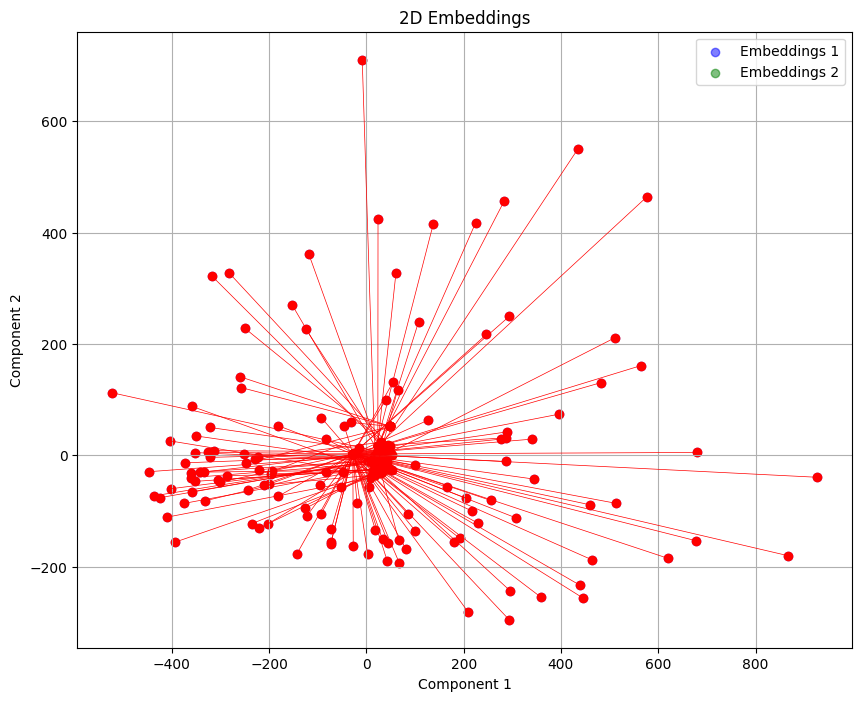

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate some example 512-dimensional embeddings
# In practice, replace these with your actual embeddings
np.random.seed(42)
embeddings1 = np.random.rand(100, 512)  # 100 samples, 512 dimensions each
embeddings2 = np.random.rand(100, 512)  # Another set of 100 samples, 512 dimensions each

embeddings1 = ecg_embeddings.cpu().detach().numpy()
embeddings2 = text_embeddings.cpu().detach().numpy()

# Option: Reduce dimensions using PCA
pca = PCA(n_components=2)
embeddings1_pca = pca.fit_transform(embeddings1)
embeddings2_pca = pca.fit_transform(embeddings2)

# Option: Reduce dimensions using t-SNE
# tsne = TSNE(n_components=2, random_state=42)
# embeddings1_tsne = tsne.fit_transform(embeddings1)
# embeddings2_tsne = tsne.fit_transform(embeddings2)

# Function to plot embeddings
def plot_embeddings(embeddings1_2d, embeddings2_2d, highlight_same_index=True):
    plt.figure(figsize=(10, 8))
    
    # Plot embeddings from the first set
    plt.scatter(embeddings1_2d[:, 0], embeddings1_2d[:, 1], c='blue', label='Embeddings 1', alpha=0.5)
    
    # Plot embeddings from the second set
    plt.scatter(embeddings2_2d[:, 0], embeddings2_2d[:, 1], c='green', label='Embeddings 2', alpha=0.5)
    
    if highlight_same_index:
        # Highlight points that have the same index in both embeddings
        for i in range(len(embeddings1_2d)):
            plt.plot([embeddings1_2d[i, 0], embeddings2_2d[i, 0]], 
                     [embeddings1_2d[i, 1], embeddings2_2d[i, 1]], 'r-', linewidth=0.5)
            plt.scatter(embeddings1_2d[i, 0], embeddings1_2d[i, 1], c='red')
            plt.scatter(embeddings2_2d[i, 0], embeddings2_2d[i, 1], c='red')
    
    plt.title('2D Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the PCA results
plot_embeddings(embeddings1_pca, embeddings2_pca)

# Plot the t-SNE results (uncomment if using t-SNE)
# plot_embeddings(embeddings1_tsne, embeddings2_tsne)
